<a href="https://colab.research.google.com/github/batulrokadia/CODSOFT/blob/main/Iris_flower_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load the dataset

In [2]:
df= sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The data type of 'species' column is object. So we need to convert it to numeric form so that it can be in a machine-readble form.

In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['species']= le.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now let's check if the dataset has any null values.

In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Now, let's visualise the data and see the relationships between the features in the dataset.

<Axes: xlabel='species', ylabel='count'>

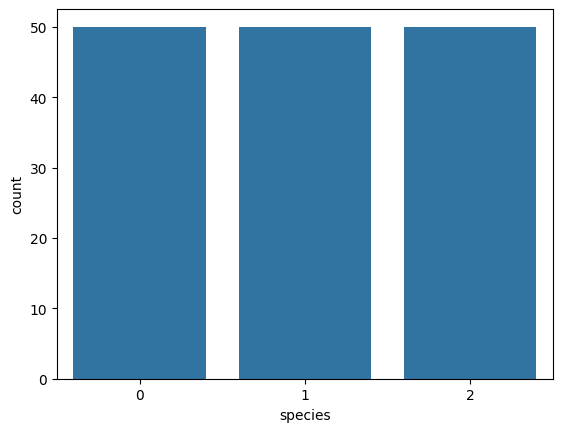

In [8]:
sns.countplot(x='species', data=df)

<Axes: title={'center': 'petal_width'}, ylabel='Frequency'>

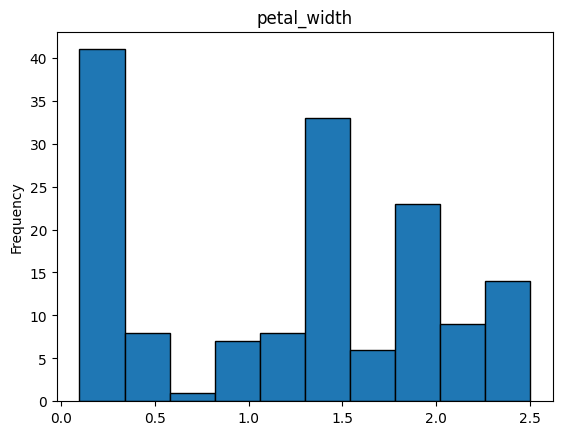

In [9]:
df['petal_width'].plot(kind='hist', edgecolor='black', bins=10, title='petal_width')


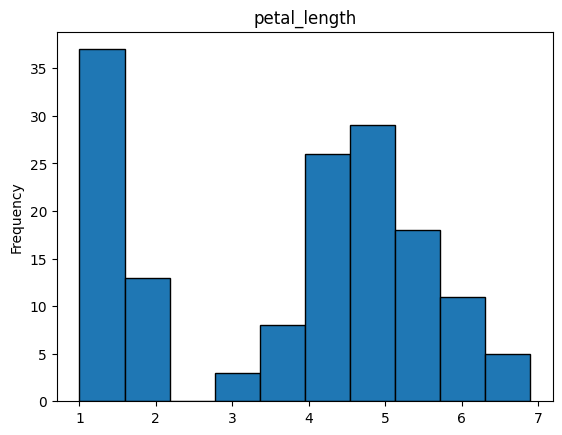

In [10]:
df['petal_length'].plot(kind='hist', edgecolor='black',bins=10, title='petal_length')
plt.show()

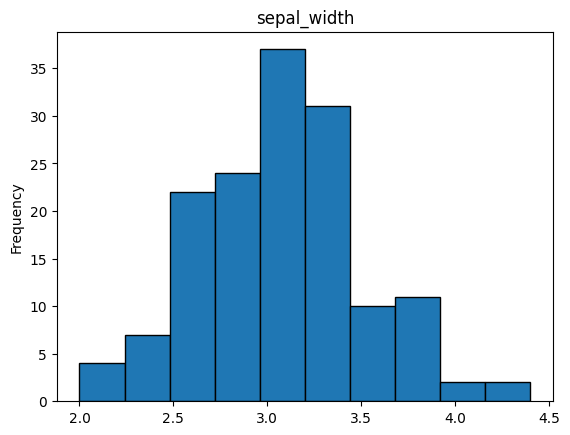

In [11]:
df['sepal_width'].plot(kind='hist', bins=10, edgecolor='black',title='sepal_width')
plt.show()

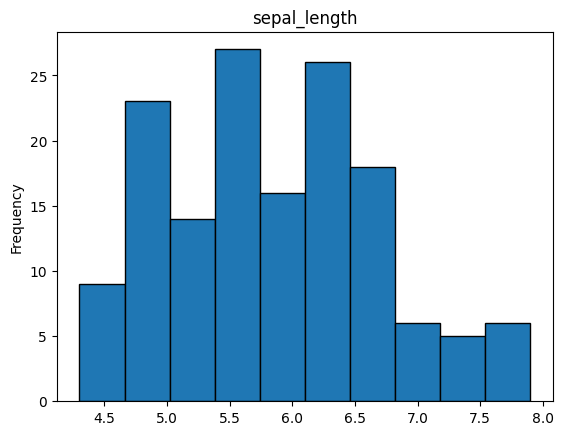

In [12]:
df['sepal_length'].plot(kind='hist', bins=10, edgecolor='black', title='sepal_length')
plt.show()

<Axes: >

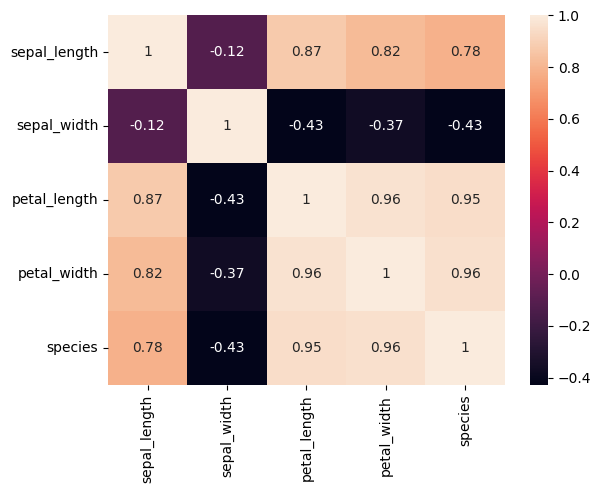

In [13]:
corr=df.corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

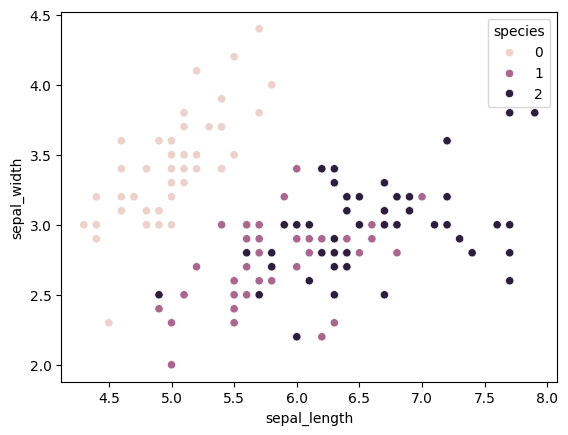

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

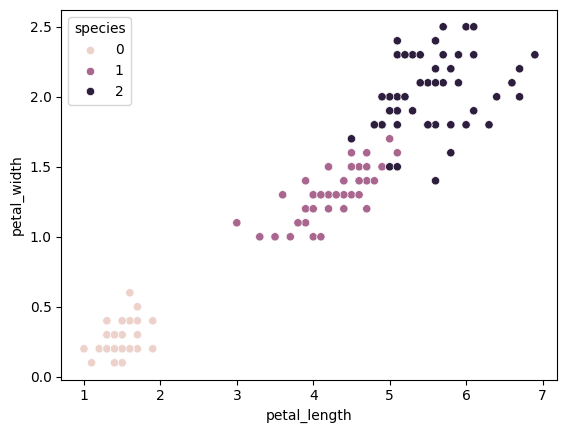

In [16]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)


We can see through the scatterplots that when we use the petal length and petal width to classify the species, they automatically get clearly divided into three separate groups.

So we will be using the petal length and petal width feature to train out model.

In [17]:
#separating the features and target variable
x=df.drop(['species','sepal_width','sepal_length'], axis=1)
y=df['species']

In [18]:
x.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [19]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [20]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=2)

We will first use the K-nearest neighbours model.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model= KNeighborsClassifier()
model.fit(x_train, y_train)


KNeighborsClassifier()

Now, we will check this model's accuracy

In [26]:
from sklearn.metrics import accuracy_score
training_prediction=model.predict(x_train)
print('The accuracy for prediction with training data using k-nearest neighbours model in percentage is: ', (accuracy_score(y_train, training_prediction))*100,'%')


The accuracy for prediction with training data using k-nearest neighbours model in percentage is:  95.83333333333334 %


In [27]:
testing_prediction=model.predict(x_test)
print('The accuracy for prediction with testing data using k-nearest neighbours model in percentage is: ', (accuracy_score(y_test, testing_prediction))*100,'%')

The accuracy for prediction with testing data using k-nearest neighbours model in percentage is:  96.66666666666667 %


So we can see that the accuracy of the model is quite similar with both the testing and training data.

Now, let's have a look at the accuracy of prediction with another model as well.

We will use Logistic Regression model.

In [28]:
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression()
model2.fit(x_train, y_train)
training_prediction2=model2.predict(x_train)
print('The accuracy for prediction with training data using logistic regression model in percentage is: ', (accuracy_score(y_train, training_prediction2))*100,'%')
testing_prediction2=model2.predict(x_test)
print('The accuracy for prediction with testing data using logistic regression model in percentage is: ', (accuracy_score(y_test, testing_prediction2))*100,'%')

The accuracy for prediction with training data using logistic regression model in percentage is:  96.66666666666667 %
The accuracy for prediction with testing data using logistic regression model in percentage is:  96.66666666666667 %


Conclusion:
We built 2 different models for prediction of classification of the species of Iris flower, i.e., K-nearest neighbors and Logistic Regression.
We also checked their accuracy scores.

The conclusion is that the Logistic Regression model gave us better accuracy in both training and testing data.